<a href="https://colab.research.google.com/github/prjazz/tensorFlow/blob/main/Cats_Vs_Dogs_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-14 09:08:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  44.7MB/s    in 1.5s    

2022-09-14 09:08:29 (44.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [11]:
import os

base_dir = '/content/cats_and_dogs_filtered'
print('Content of base directory:\n', os.listdir(base_dir))

print('Content of train directory:\n', os.listdir(f'{base_dir}/train'))
print('Content of validation directory:\n', os.listdir(f'{base_dir}/validation'))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames =  os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print('\nSome training cat file names:', os.listdir(train_cats_dir)[:10])
print('\nSome training dog file names:', os.listdir(train_dogs_dir)[:10])

print('\nTotal number of training cat file:', len(os.listdir(train_cats_dir)))
print('\nTotal number of training dog file:', len(os.listdir(train_dogs_dir)))

print('\nTotal number of validation cat file:', len(os.listdir(validation_cat_dir)))
print('\nTotal number of validation dog file:', len(os.listdir(validation_dogs_dir)))

Content of base directory:
 ['train', 'validation', 'vectorize.py']
Content of train directory:
 ['cats', 'dogs']
Content of validation directory:
 ['cats', 'dogs']

Some training cat file names: ['cat.774.jpg', 'cat.228.jpg', 'cat.835.jpg', 'cat.542.jpg', 'cat.779.jpg', 'cat.450.jpg', 'cat.349.jpg', 'cat.156.jpg', 'cat.812.jpg', 'cat.244.jpg']

Some training dog file names: ['dog.660.jpg', 'dog.897.jpg', 'dog.248.jpg', 'dog.322.jpg', 'dog.57.jpg', 'dog.148.jpg', 'dog.236.jpg', 'dog.836.jpg', 'dog.743.jpg', 'dog.247.jpg']

Total number of training cat file: 1000

Total number of training dog file: 1000

Total number of validation cat file: 500

Total number of validation dog file: 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [22]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
test_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit(train_generator, epochs = 15, validation_data = test_generator, verbose = 2)

Epoch 1/15
100/100 - 21s - loss: 0.7169 - accuracy: 0.5590 - val_loss: 0.6427 - val_accuracy: 0.6240 - 21s/epoch - 208ms/step
Epoch 2/15
100/100 - 8s - loss: 0.6164 - accuracy: 0.6685 - val_loss: 0.5757 - val_accuracy: 0.6930 - 8s/epoch - 82ms/step
Epoch 3/15
100/100 - 8s - loss: 0.5378 - accuracy: 0.7295 - val_loss: 0.5665 - val_accuracy: 0.7030 - 8s/epoch - 81ms/step
Epoch 4/15
100/100 - 8s - loss: 0.4516 - accuracy: 0.7900 - val_loss: 0.5625 - val_accuracy: 0.7200 - 8s/epoch - 82ms/step
Epoch 5/15
100/100 - 8s - loss: 0.3630 - accuracy: 0.8320 - val_loss: 0.5846 - val_accuracy: 0.7170 - 8s/epoch - 80ms/step
Epoch 6/15
100/100 - 8s - loss: 0.2733 - accuracy: 0.8820 - val_loss: 0.7274 - val_accuracy: 0.7140 - 8s/epoch - 81ms/step
Epoch 7/15
100/100 - 8s - loss: 0.2016 - accuracy: 0.9160 - val_loss: 0.7596 - val_accuracy: 0.7130 - 8s/epoch - 80ms/step
Epoch 8/15
100/100 - 8s - loss: 0.1319 - accuracy: 0.9470 - val_loss: 2.1598 - val_accuracy: 0.6060 - 8s/epoch - 80ms/step
Epoch 9/15
10

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (150, 150))
  x = image.img_to_array(img)
  x /= 255.0
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if (classes[0] > 0.5):
    print(fn + ' is a dog')
  else:
    print(fn + ' is a cat')

Text(0.5, 1.0, 'Training and validation loss')

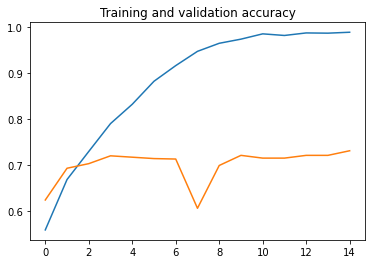

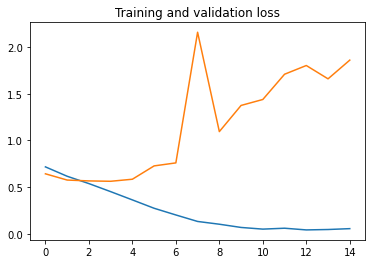

In [34]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

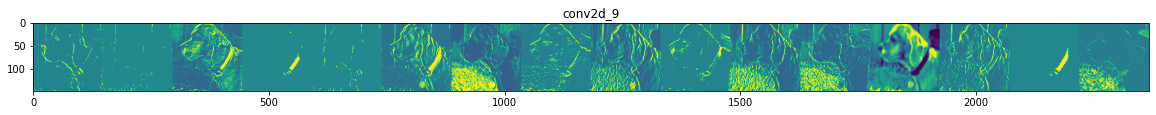

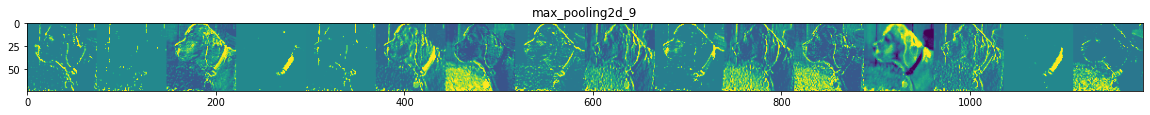

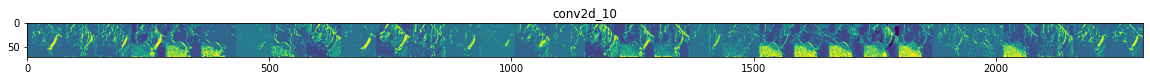

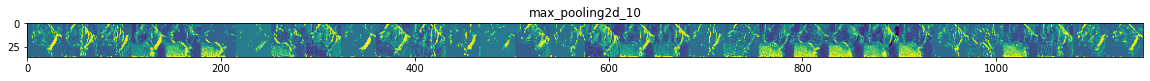

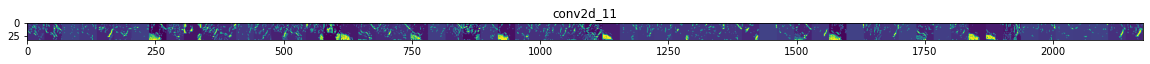

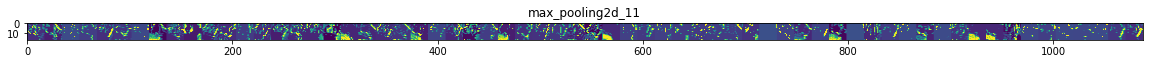

In [35]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )